In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import json
import seaborn as sns
import os
from scipy.stats import ttest_rel
import matplotlib.colors as colors
import statsmodels.api as sm

In [2]:
plt.rcParams['font.sans-serif'] = 'Times New Roman'

In [3]:
def read_json_list(json_file):
    if not (os.path.exists(json_file) and os.path.isfile(json_file)):
        with open(json_file, 'w') as f:
            f.write('[]')
    with open(json_file, 'r', encoding='utf-8') as f:
        try:
            lst = json.load(f)
        except:
            lst = []
    return lst

In [4]:
# From classical method
angle = read_json_list('./angle.dat')  # Angle
dists = read_json_list('./dist.dat')  # Spacing
length = read_json_list('./length.dat')  # Density

# From Bezier curve
curv = read_json_list('./curv.dat') # Curvature
num_conn = read_json_list('./num_conn.dat')  # Connected Compnents
winding = read_json_list('./winding.dat') # Winding Degree

person = 93

In [5]:
len(dists)

4

In [6]:
total_winding = [[[]],[[]],[[]],[[]]]
mean_winding = [[[]],[[]],[[]],[[]]]
average_curv = [[[]],[[]],[[]],[[]]]

for i in range(4):
    for j in range(1, len(winding[i])):
        total_winding[i].append([])
        mean_winding[i].append([])
        for k in range(len(winding[i][j])):
            total_winding[i][j].append(np.sum(winding[i][j][k]))
            mean_winding[i][j].append(np.mean(winding[i][j][k]))
    for j in range(1, len(curv[i])):
        average_curv[i].append([])
        for k in range(len(curv[i][j])):
            tmp_cur = 0
            tmp_len = 0
            for l in range(len(curv[i][j][k])):     # Curve
                tmp_cur += curv[i][j][k][l][0]
                tmp_len += curv[i][j][k][l][1]
            average_curv[i][j].append(tmp_cur/tmp_len)

In [7]:
all_total_winding = [[],[],[],[]]
all_mean_winding = [[],[],[],[]]
all_average_curv = [[],[],[],[]]
all_num_conn = [[],[],[],[]]
for i in range(4):
    for j in range(1, person+1):
        all_total_winding[i] = all_total_winding[i] + total_winding[i][j]
        all_mean_winding[i] = all_mean_winding[i] + mean_winding[i][j]
        all_average_curv[i] = all_average_curv[i] + average_curv[i][j]
        all_num_conn[i] = all_num_conn[i] + num_conn[i][j]

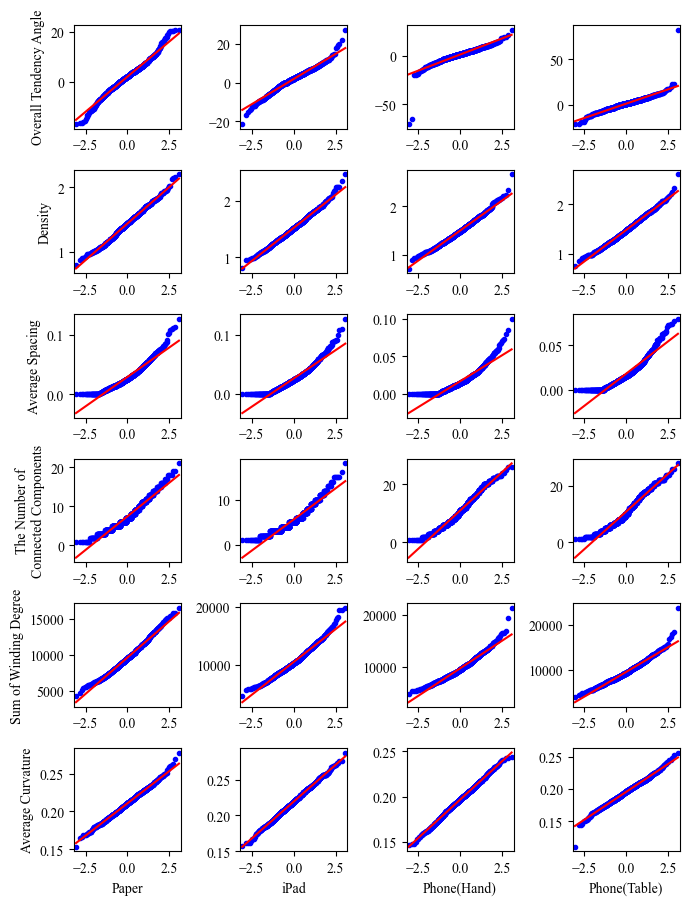

In [8]:
fig, ax = plt.subplots(6, 4, figsize = (7,9))

feature_names = ['Overall Tendency Angle', 'Density', 'Average Spacing','The Number of\nConnected Components', 'Sum of Winding Degree', 'Average Curvature']
features = [angle, length, dists, all_num_conn, all_total_winding, all_average_curv]
sample_names = ['Paper', 'iPad', 'Phone(Hand)', 'Phone(Table)']

for i in range(6):
    for j in range(4):
        data = np.array(features[i][j])
        sm.qqplot(data, marker='.', markerfacecolor='b', markeredgecolor='b', line='s', ax = ax[i][j])
        ax[i][j].set_xlabel('')
        ax[i][j].set_ylabel('')
        if i == 5:
            ax[i][j].set_xlabel(sample_names[j])
        if j == 0:
            ax[i][j].set_ylabel(feature_names[i])

plt.tight_layout()
plt.show()
fig.savefig('qq-1.pdf', bbox_inches='tight',pad_inches=0.05)

In [9]:
pvalue = [[],[],[],[]]

pvalue[0].extend(read_json_list('./control_p.dat'))  # Control Group

pvalue[1].append(ttest_rel(angle[0],angle[1])[1])
pvalue[1].append(ttest_rel(length[0],length[1])[1])
pvalue[1].append(scipy.stats.wilcoxon(dists[0], dists[1], zero_method='wilcox', correction=False)[1])
pvalue[1].append(scipy.stats.wilcoxon(all_num_conn[0], all_num_conn[1], zero_method='wilcox', correction=False)[1])
pvalue[1].append(ttest_rel(all_total_winding[0],all_total_winding[1])[1])
pvalue[1].append(ttest_rel(all_average_curv[0],all_average_curv[1])[1])

pvalue[2].append(ttest_rel(angle[0],angle[2])[1])
pvalue[2].append(ttest_rel(length[0],length[2])[1])
pvalue[2].append(scipy.stats.wilcoxon(dists[0], dists[2], zero_method='wilcox', correction=False)[1])
pvalue[2].append(scipy.stats.wilcoxon(all_num_conn[0], all_num_conn[2], zero_method='wilcox', correction=False)[1])
pvalue[2].append(ttest_rel(all_total_winding[0],all_total_winding[2])[1])
pvalue[2].append(ttest_rel(all_average_curv[0],all_average_curv[2])[1])

pvalue[3].append(ttest_rel(angle[0],angle[3])[1])
pvalue[3].append(ttest_rel(length[0],length[3])[1])
pvalue[3].append(scipy.stats.wilcoxon(dists[0], dists[3], zero_method='wilcox', correction=False)[1])
pvalue[3].append(scipy.stats.wilcoxon(all_num_conn[0], all_num_conn[3], zero_method='wilcox', correction=False)[1])
pvalue[3].append(ttest_rel(all_total_winding[0],all_total_winding[3])[1])
pvalue[3].append(ttest_rel(all_average_curv[0],all_average_curv[3])[1])

pvalue = np.array(pvalue).T
pvalue

array([[7.68507585e-02, 3.08425346e-01, 1.31578775e-03, 1.30537163e-03],
       [2.55843247e-01, 2.07089572e-49, 1.52484718e-18, 1.60630440e-11],
       [1.81411158e-01, 5.67832442e-08, 7.63648625e-77, 1.55719151e-63],
       [2.38888309e-01, 2.06551444e-72, 6.53892285e-78, 9.65832047e-77],
       [8.55981141e-02, 7.67566076e-49, 7.28669583e-01, 1.38734813e-01],
       [9.85704725e-01, 6.45524198e-35, 2.09955389e-81, 2.06558946e-85]])

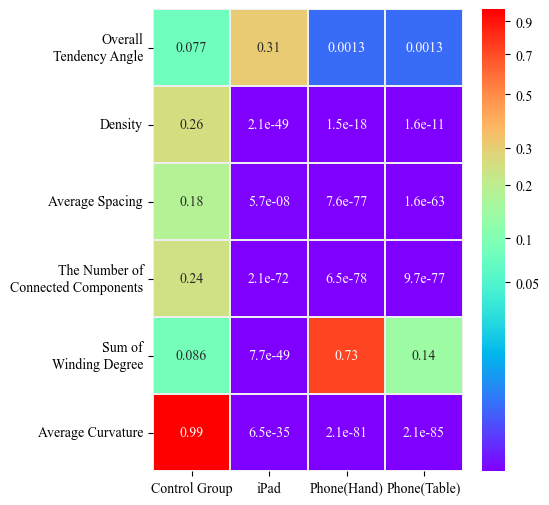

In [10]:
width = 0.25

# def _forward(x):
#     return np.log(x+1e-70)

# def _inverse(x):
#     return np.exp(x)

#norm = colors.FuncNorm((_forward, _inverse))
fig = plt.figure(figsize=(5,6))
ax = sns.heatmap(pvalue, annot=True, linewidths=0.3, linecolor='#EEEEEE', cmap="rainbow", norm=colors.PowerNorm(gamma=0.3))
plt.xticks([0.5,1.5,2.5, 3.5], ['Control Group', 'iPad', 'Phone(Hand)', 'Phone(Table)'])
plt.yticks([0.5,1.5,2.5, 3.5, 4.5, 5.5], ['Overall\nTendency Angle', 'Density', 'Average Spacing','The Number of\nConnected Components', 'Sum of\nWinding Degree', 'Average Curvature'], rotation=0)

c_bar = ax.collections[0].colorbar
c_bar.set_ticks([0.9, 0.7,0.5, 0.3, 0.2, 0.1, 0.05])
c_bar.set_ticklabels([0.9, 0.7,0.5, 0.3, 0.2, 0.1, 0.05])

fig.savefig('ttest-1.pdf', bbox_inches='tight',pad_inches=0.05)